<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Copy_of_lab1_sea_level_rise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENVPHYS300 Lab 1: Python, Linear Regression, and Sea Level Rise**

The aim of this first lab is to become familiar with using Python to analyse and visualise scientific data. We will also fit some models to sea level data to explain trends over time.

**Lab work and submission:** Complete all the exercises within the notebook itself, unless otherwise stated. Make sure you save the notebook (ideally to your Google Drive) before beginning, and save regularly throughout. You are encouraged to work on the problems together, but everyone will submit their own work. Submit your .ipynb notebook file along with any other files or data through Canvas.

First, we import the python libraries we'll use in this notebook

In [ ]:
import pandas as pd # pandas is a suite of tools to use on (csv) data
import matplotlib.pyplot as plt # plotting tools
import numpy as np # numerical tools
import scipy.stats # this package has a pre-made linear regression function

## Sea Level Data
Sea level measurements for the Auckland harbour are averaged over the year to obtain a mean sea level and standard deviation. The Python library [pandas](https://pandas.pydata.org) can easily read CSV data for us, without needing to know a lot of programming. Then we will convert the *pandas* data into a [NumPy](http://numpy.org) matrix, so we can easily work with the data throughout the rest of this notebook.

In [ ]:
url="https://www.linz.govt.nz/sites/default/files/data/Auckland_Annual_MSL.csv"
harbour_data = pd.read_csv(url,delimiter=',',names=['year','MSL','err','comment'],skiprows=2)

There are a few years with no data. Here, we remove the lines with no data. This is quite tricky if you are new to pandas, or even python, so just bare with us:

In [ ]:
harbour_data['MSL'].replace('', np.nan, inplace=True) # first we change all empty cells in the 'MSL' column with NaN (Not a Number)
harbour_data.dropna(subset=['MSL'], inplace=True) # then, we remove all lines in the data frame that have an NaN in the 'MSL' column.

There is a ton of things you can do directly with the dataframe harbour_data. You can access the different columns, like this:

In [ ]:
harbour_data['year']

0      1899
1      1900
2      1901
4      1903
5      1904
       ... 
119    2018
120    2019
121    2020
122    2021
123    2022
Name: year, Length: 122, dtype: int64

Note that pandas is smart enough to recognize these values in the column 'year' are integers. Pandas has lots of options to work with these data, including plotting capabilities, but here we just take advantage of the ease of reading in data, and then we convert the columns to numpy arrays, with the to_numpy() attribute in pandas dataframes:

In [ ]:
time = harbour_data['year'].to_numpy()
print(time)

[1899 1900 1901 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


#### Exercise 1
In our case, the matrix has all the time data in the first column, all the sea level height in the second column, and the standard deviations in the third column. In the cell below, create three variables ```time```, ```height```, and ```errors```, and assign the correct data to each.

In [ ]:
height = harbour_data['MSL'].to_numpy()
print(height)  # Extract the sea level data from the data frame and put the values in a numpy array
errors = harbour_data['err'].to_numpy()
print(errors)   # Extract the uncertainty in the sea level data from the data frame and put the values in a numpy array

[1.714 1.711 1.671 1.726 1.712 1.691 1.673 1.729 1.766 1.748 1.776 1.795
 1.751 1.72  1.68  1.723 1.776 1.771 1.752 1.72  1.769 1.714 1.777 1.74
 1.785 1.741 1.707 1.742 1.763 1.749 1.73  1.687 1.729 1.73  1.747 1.765
 1.743 1.758 1.846 1.799 1.738 1.746 1.736 1.78  1.737 1.749 1.788 1.835
 1.813 1.812 1.818 1.754 1.773 1.783 1.828 1.895 1.838 1.812 1.823 1.847
 1.819 1.83  1.809 1.788 1.774 1.824 1.793 1.798 1.768 1.8   1.888 1.834
 1.803 1.86  1.839 1.832 1.799 1.807 1.831 1.817 1.817 1.805 1.776 1.811
 1.86  1.836 1.79  1.793 1.879 1.847 1.833 1.825 1.795 1.791 1.845 1.856
 1.826 1.818 1.912 1.911 1.934 1.888 1.906 1.872 1.895 1.88  1.86  1.905
 1.896 1.856 1.917 1.907 1.931 1.936 1.941 1.957 1.965 1.964 1.938 1.937
 1.97  2.006]
[0.03  0.03  0.04  0.06  0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0

Next, we will plot sea level in the Auckland Harbour, as a function of time, using [matplotlib](https://matplotlib.org/):

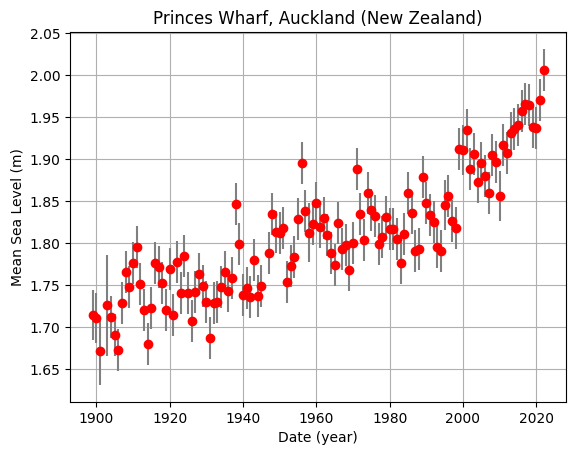

In [ ]:
plt.errorbar(time, height, yerr=errors, color='r', ecolor='gray', marker='o', linestyle='')
plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Mean Sea Level (m)')
plt.title('Princes Wharf, Auckland (New Zealand)')
plt.axis('tight')
plt.savefig('test.png', bbox_inches='tight')
plt.show()

### Linear regression

The value for mean sea level goes up and down, but clearly has a trend upwards. Let's see what the best fitting line is through these data.
There are many ways to do such a linear regression, or more advanced polynomial fitting, in Python. Here's one example of linear regression from the stats functions in scipy:

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time, height)
print(slope, intercept)

0.00176199635200876 -1.6461776656024907


#### Exercise 2
Replot the data, adding the best-fitting line through these data.

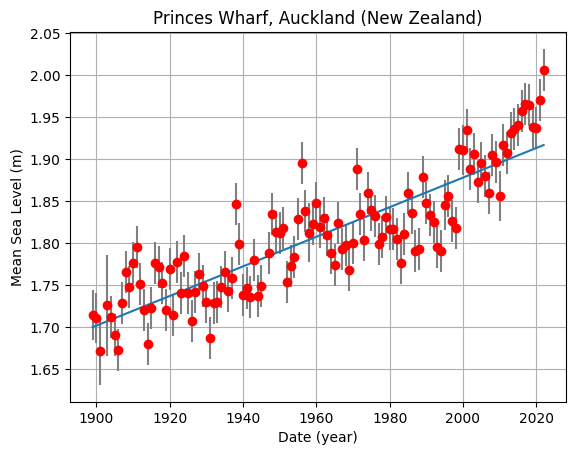

In [ ]:
# write your code here
plt.errorbar(time, height, yerr=errors, color='r', ecolor='gray', marker='o', linestyle='')
plt.grid()
plt.plot(time, slope*time + intercept)
plt.xlabel('Date (year)')
plt.ylabel('Mean Sea Level (m)')
plt.title('Princes Wharf, Auckland (New Zealand)')
plt.axis('tight')
plt.savefig('test.png', bbox_inches='tight')
plt.show()

### Residuals or misfit
#### Exercise 3
The line looks like a reasonable representation of the data, but how did we do from a quantitative point of view? Let's compute the mean and standard deviation of the residual values (these are the values of the water depth minus the best fitting straight line through the data). Compute and print these values below:

In [ ]:
# Write code here
mean = sum(height) / (2022 - 1899)
print(mean)
std_dev = sum((height - mean)**2) / (2022 - 1899)
print(std_dev)

1.7945609756097565
0.005419034126028338


#### Exercise 4
If the regression did its job, the mean is practically zero. This means that any overshooting by the observations are balanced by undershootings. What did you find for the standard devation? What factors can you think of that contribute to the standard deviation? Type your responses in the box below: (Note, the scientists involved in collecting these data estimate the standard error in each of these annual means for sea level in Auckland is 2.5 cm)

<font color='red'>*Type your answers here*<font>

<font color='blue'>
Standard deviation is a statistic that measures the spread of values ​​in a data set. In this case, if the mean of the data is close to zero, the standard deviation is likely to be small because the data points do not fluctuate much relative to the mean. The standard deviation is affected by the distribution of the data. If the data distribution is relatively concentrated, the standard deviation will be small; if the data distribution is scattered, the standard deviation will be large. In addition, measurement error and the number of data samples also affect the size of the standard deviation. Scientists estimate that the standard error of the annual average sea level is 2.5 centimeters, while the mean sea level is around 179.5 centimeters. Generally speaking, the error and standard deviation are also small.

If we were to feel that the linear model is a "poor" fit, one could always fit the data better with a model that has more degrees of freedom. Does this experiment warrant a quadratic term? Or even higher-order polynomials? Maybe not over these 100 years of data, but if the rise is due to climate change and we have positive feedbacks, maybe we should account for that in our model. In any case:

**Given enough degrees of freedom in the model, we can fit the (any) data perfectly!**

If we decided to model the data with a polynomial instead of a straight line, then we could use the NumPy [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function. Here, we fit with a third-degree polynomial:

In [ ]:
fit = np.polyfit(time, height, 3) #Least squares polynomial fit. Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y).

curve = (fit[0] * time ** 3) + (fit[1] * time ** 2) + (fit[2] * time) + fit[3]

### Sea level rise in a time of climate change
#### Exercise 5
Australian scientists show historic data also support our linear regression results of a [1 to 2 mm/y rise in sea level](https://en.wikipedia.org/wiki/Sea_level_rise) averaged over the last 100+ years. However, tidal gauge and satellite data from the last decade(s) indicate sea level may now be rising at [double this rate](https://en.wikipedia.org/wiki/Sea_level_rise), according to the latest IPCC report! With this info, have another look at the Auckland data. Most sea level values in the 2000s falls *above* the regression line. It would require more than data from just one tidal gauge to attribute this significant, of course. Especially when you learn that the Auckland tidal gauge has been moved site three times since 2000. However, for the sake of a fitting exercise, write code to fit these data with a polynomial (see example above) and [an exponentional function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Plot the data with the linear, polynomial, and exponential fits on the same plot, and caluclate the residuals for each of the fits.

(array([1., 1., 1.]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))
3.363902720501258e-14 0.014695144081174404 1.6832124512891171


<ipython-input-30-4515e57aa356>:7: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(b*x) + c
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


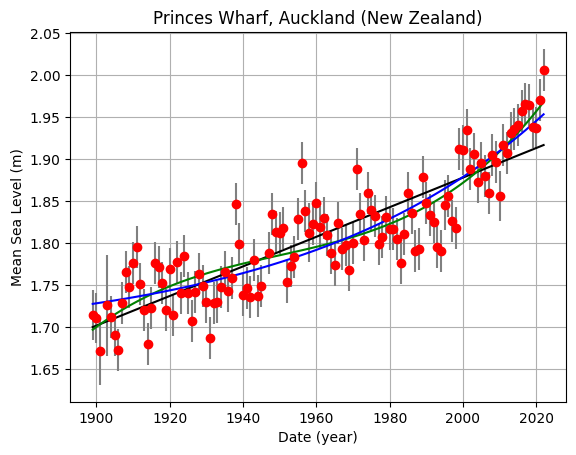

In [ ]:
# Write code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_func(x,a,b,c):
  y = a * np.exp(b*x) + c
  return y

fit = curve_fit(exp_func, time, height, [1, 0.01, 1])[0]
print(curve_fit(exp_func, time, height))
a = fit[0]
b = fit[1]
c = fit[2]
print(a,b,c)
curve_exp = a * np.exp(b*time) + c
plt.errorbar(time, height, yerr=errors, color='r', ecolor='gray', marker='o', linestyle='')
plt.grid()
plt.plot(time, slope*time + intercept, color='black')
plt.plot(time, curve, color='green')
plt.plot(time, curve_exp, color='blue')
plt.xlabel('Date (year)')
plt.ylabel('Mean Sea Level (m)')
plt.title('Princes Wharf, Auckland (New Zealand)')
plt.axis('tight')
plt.savefig('test.png', bbox_inches='tight')
plt.show()

In [ ]:
residuals_1 = (slope*time + intercept) - height
mean1 = sum(residuals_1) / (2022 - 1899)
residuals_2 = curve - height
mean2 = sum(residuals_2) / (2022 - 1899)
residuals_3 = curve_exp - height
mean3 = sum(residuals_3) / (2022 - 1899)
print(mean1)
print(mean2)
print(mean3)

1.6788738421160904e-16
-5.296188059024252e-12
-1.1312734039509842e-08


#### Exercise 6
Are the polynomial residuals smaller than for a linear fit? How about the exponential residuals? Are any of the residuals closer to the reported standard error in the data? What do you conclude?

<font color='red'>*Type your answers here*<font>

<font color='blue'>
The residual of the linear fit is 1.68e-16, which is close to zero, indicating that the linear model has a better fitting effect. The residual from the polynomial fit is -5.30e-12, which is larger than the residual from the linear fit, but still very close to zero. The residual of the exponential function fit is -1.13e-08, which is larger than the residuals of the linear and polynomial fits, but is still very close to zero. From this perspective, the residuals of all three fitting methods are small and there is no obvious difference. Although the residual from the exponential function fit is relatively large, it is still much smaller than the standard error reported for the data. The residuals of linear and polynomial fits are closer to zero than the standard errors. This suggests that the model fit may be better than the standard error. In summary, based on the comparison of residual values ​​and standard errors, linear and polynomial fits may perform better because their residuals are closer to zero. The residuals from the exponential function fit, although relatively large, still perform better than the standard errors. Therefore, it can be tentatively concluded that linear and polynomial fitting may be more suitable than exponential function fitting to describe the trend of the data.<font>

### Using multiple datasets to understand a trend
As we have seen, it is often difficult to confirm or reject particular models based on one dataset. This is why geophysicists combine multiple different types of data to build a better picture of what is physically happening. However, it often takes a bit of geophysics detective work to prove or disprove a particular hypothesis...

#### Exercise 7
The following list gives the average sea level height from 2011-2020 recorded at a location somewhere in New Zealand. Write some code to plot the data.

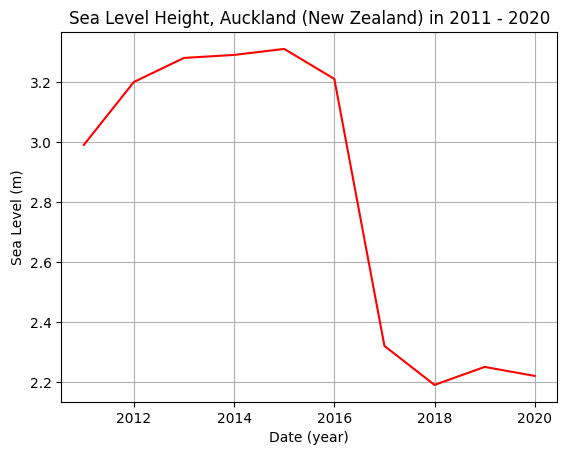

In [ ]:
years = range(2011,2021)
sea_level = np.array([2.99, 3.2, 3.28, 3.29, 3.31, 3.21, 2.32, 2.19, 2.25, 2.22])

# Plot the data here
plt.plot(years, sea_level, color='r')
plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Sea Level (m)')
plt.title('Sea Level Height, Auckland (New Zealand) in 2011 - 2020')
plt.axis('tight')
plt.savefig('test.png', bbox_inches='tight')
plt.show()

Is this trend different to what you would expect? What do you think could be causing this discrepancy? (Note: measurement error has been ruled out as a possible cause)

<font color='red'>*Type your answer here*<font>

<font color='blue'>
Based on the data provided from 2011 to 2020, we can see some anomalies, a sharp drop in sea level between 2016 and 2017, which may not be consistent with our expectations of sea level changes. This may be due to natural variations, human factors, data quality, etc. Natural factors include climate change, seasonal changes, ocean circulation, etc. Global warming, changes in land use, etc. will also have an impact on sea levels. Although measurement error has been ruled out here, other factors may still exist, such as the impact of missing data, data processing methods and other factors.

#### Exercise 8
In order to confirm or deny our hypothesis for what we observe, we need to use a second type of data. Locate and download a second dataset that will help you explain the trend you observe in the sea level data. Explain why you chose this dataset in the space below. You may find these links helpful:

[Map of sea level gauge locations in New Zealand](https://www.linz.govt.nz/sea/tides/sea-level-data/sea-level-data-downloads)

[Map of geodetic sensors in New Zealand](https://www.geonet.org.nz/data/gnss/map)

[Instructions for how to download data from GeoNet](https://fits.geonet.org.nz/api-docs/endpoint/observation)

<font color='red'>*Type your answer here*<font>

years = range(2011,2021)

the data of mean sea level in Auckland below which from another dataset

sea_level = np.array([5.42, 4.96, 5.11, 5.12, 5.15, 5.16, 5.18, 5.20, 5.26, 5.30])

This second one provides mean sea level data for Auckland for the same data area as the first, and both from 2011 to 2021. In this way, we can directly compare the two data sets and thus better assess the trends and characteristics of sea level change. By comparing the two data sets, we can determine that there are large differences between the two data, not only in the differences in data, but also in the trends presented.


#### Exercise 9
Plot your dataset with the sea level data and explain how they combine to help you understand the physical processes at work.

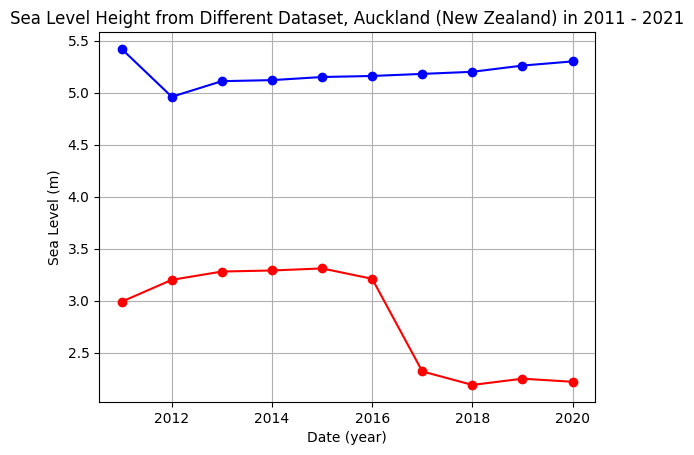

In [ ]:
# Make a plot here
years = range(2011,2021)
sea_level = np.array([2.99, 3.2, 3.28, 3.29, 3.31, 3.21, 2.32, 2.19, 2.25, 2.22])
sea_level1 = np.array([5.42, 4.96, 5.11, 5.12, 5.15, 5.16, 5.18, 5.20, 5.26, 5.30])

plt.plot(years, sea_level, color='red', marker='o', label='Auckland data 1')
plt.plot(years, sea_level1, color='blue', marker='o', label='Auckland data 2')

plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Sea Level (m)')
plt.title('Sea Level Height from Different Dataset, Auckland (New Zealand) in 2011 - 2021')
plt.axis('tight')
plt.savefig('test.png', bbox_inches='tight')
plt.show()


<font color='red'>*Type your answer here*<font>

<font color='blue'>
Understanding the physical processes of sea level change involves multiple factors, including climate change, geological structures, ocean circulation, and more. By looking at sea level data, we can interpret these physical processes from different perspectives. Observing these phenomena at the same time requires reliable data. We can analyze whether there are climate, man-made, geological and other influences based on the changing trends of the data. A huge difference can be seen from the two data provided above, and depending on the source of the data, it can be determined that the second data is more reliable. By observing sea level data and analyzing the physical processes behind it, we can better understand the causes and mechanisms of sea level change. This helps us predict future sea level changes.